# Grey Lines Light Logging Demo

The scene defined for this activity includes:

- the LineTracer robot;
- a test track comprising three gray lines.

The LineTracer in this scene is instrumented with some simple odemetry that tracks the number of rotations of the left wheel.

In [45]:
%run 'Set-up.ipynb'
%run 'Loading scenes.ipynb'

In [97]:
%run 'vrep_models/lineTracer.ipynb'

Loading class: lineTracer
Methods available in lineTracer:
	fwd_left
	fwd_right
	getrots
	getval
	left_light
	left_line
	move_backward
	move_forward
	position_left_joint
	right_light
	right_line
	stop



## Run over lines for a specified time

In [ ]:
#Make use of time in demos
import time

In [65]:
%%vrepsim '../scenes/OU_grey lines.ttt' lineTracer
steps=10
while steps:
    robot.move_forward(2)
    time.sleep(0.3)
    steps=steps-1

## Run over lines for a specified number of wheel rotations

Also log the left light sensor average intensity value.

In [98]:
import pandas as pd
data={'light':pd.DataFrame()}

In [99]:
%%vrepsim '../scenes/OU_grey lines.ttt' lineTracer

speed=2
sample_rate=0.3
max_rotations=5

robot.move_forward(speed)
while robot.getrots()<max_rotations:    
    data['light']=pd.concat([data['light'], pd.DataFrame([{'rots':robot.getrots(),
                                                           'line_left':robot.left_line(),
                                                           'light_left':robot.left_light()}])])
    time.sleep(sample_rate)

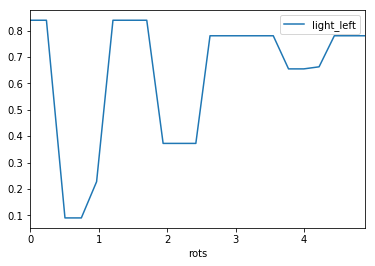

In [100]:
%matplotlib inline
data['light'].plot(x='rots',y='light_left');